# TFY41xx Fysikk våren 2021.

Programmet tar utgangspunkt i høyyden til de 8 festepunktene.
Deretter beregnes baneformen $y(x)$ ved hjelp av 7 tredjegradspolynomer, 
et for hvert intervall mellom to festepunkter, slik at både banen $y$, 
dens stigningstall $y^\prime = \frac{dy}{dx}$ og dens andrederiverte
 $y^{\prime \prime} = \frac{d^2y}{dx^2}$ er kontinuerlige i de 6 indre festepunktene.
 I tillegg velges null krumning (andrederivert) 
 i banens to ytterste festepunkter (med `bc_type='natural'` nedenfor).
 Dette gir i alt 28 ligninger som fastlegger de 28 koeffisientene
 i de i alt 7 tredjegradspolynomene.

 De ulike banene er satt opp med tanke paa at kula skal 

*   Fullføre hele banen selv om den taper noe mekanisk energi underveis;
*   Rulle rent, uten  gli ("slure").


Vi importerer noedvendige biblioteker:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

Horisontal avstand mellom festepunktene er 0.200 m:

In [4]:
h = 0.200
xfast=np.asarray([0,h,2*h,3*h,4*h,5*h,6*h,7*h])

Start, slutt og steglengde i x-rettning

In [5]:
xmin = 0.000
xmax = 1.401
dx = 0.001

Skriv inn y-verdiene til banens 8 festepunkter i tabellen yfast, basert på avlesing i tracker. Et vilkårlig eksempel:

In [6]:
yfast = np.asarray([0.361,0.277,0.293,0.251,0.257,0.214,0.260,0.216])

Programmet beregner deretter de 7 tredjegradspolynomene, et for hvert intervall mellom to nabofestepunkter. Med scipy.interpolate-funksjonen CubicSpline:

In [7]:
cs = CubicSpline(xfast, yfast, bc_type='natural')


Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eventuelt for mange horisontale posisjoner lagret i en tabell: <br>
`cs(x)`   tilsvarer $y(x)$<br>
`cs(x,1)` tilsvarer $y'(x)$<br>
`cs(x,2)` tilsvarer $y''(x)$<br>

<br>
Her lager vi en tabell med x-verdier mellom 0 og 1.4 m

In [8]:
x = np.arange(xmin, xmax, dx) 

Funksjonen arange returnerer verdier på det "halvåpne" intervallet
`[xmin,xmax)`, dvs slik at xmin er med mens xmax ikke er med. Her blir
dermed `x[0]=xmin=0.000`, `x[1]=xmin+1*dx=0.001`, ..., `x[1400]=xmax-dx=1.400`, 
dvs x blir en tabell med 1401 elementer

In [9]:
Nx = len(x)
y = cs(x)       #y=tabell med 1401 verdier for y(x)
dy = cs(x,1)    #dy=tabell med 1401 verdier for y'(x)
d2y = cs(x,2)   #d2y=tabell med 1401 verdier for y''(x)

Eksempel: Plotter banens form y(x):

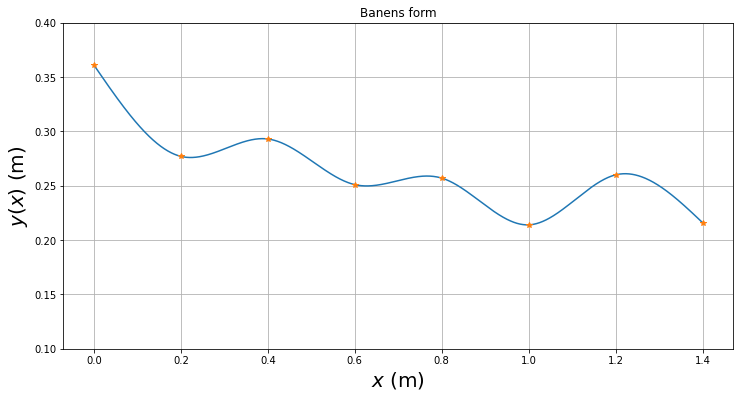

In [10]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form')
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.ylim(0.10,0.40)
plt.grid()
plt.show()

Denne koden kan nå utvides til å regne ut flere interessante størelser: